# SLR Practice

### Imports

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor

import sklearn.metrics as metrics

import statsmodels.api as sm

from statsmodels.stats.stattools import durbin_watson


### Get the data

In [86]:
df = pd.read_csv('./data/train.csv')

I always fix my column names first. 

In [87]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [88]:
# list comp!
df.columns = [name.strip().lower().replace(' ','').replace('-','') for name in df.columns]

In [89]:
# Check it out
df.columns

Index(['id', 'mssubclass', 'mszoning', 'lotfrontage', 'lotarea', 'street',
       'alley', 'lotshape', 'landcontour', 'utilities', 'lotconfig',
       'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype',
       'housestyle', 'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd',
       'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype',
       'masvnrarea', 'exterqual', 'extercond', 'foundation', 'bsmtqual',
       'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1',
       'bsmtfintype2', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating',
       'heatingqc', 'centralair', 'electrical', '1stflrsf', '2ndflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'kitchenqual',
       'totrmsabvgrd', 'functional', 'fireplaces', 'fireplacequ', 'garagetype',
       'garageyrblt', 'garagefinish', 'garagecars', 'garagearea', 'garagequal',
       'garagecond', 'paveddrive

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1460 non-null   int64  
 1   mssubclass     1460 non-null   int64  
 2   mszoning       1460 non-null   object 
 3   lotfrontage    1201 non-null   float64
 4   lotarea        1460 non-null   int64  
 5   street         1460 non-null   object 
 6   alley          91 non-null     object 
 7   lotshape       1460 non-null   object 
 8   landcontour    1460 non-null   object 
 9   utilities      1460 non-null   object 
 10  lotconfig      1460 non-null   object 
 11  landslope      1460 non-null   object 
 12  neighborhood   1460 non-null   object 
 13  condition1     1460 non-null   object 
 14  condition2     1460 non-null   object 
 15  bldgtype       1460 non-null   object 
 16  housestyle     1460 non-null   object 
 17  overallqual    1460 non-null   int64  
 18  overallc

I'll create an SLR using one feature and `saleprice` as the target.

In [91]:
# Create target/output and features/input
X = df[['grlivarea']]
y = df.saleprice

In [92]:
X.head()

,grlivarea
0,1710
1,1262
2,1786
3,1717
4,2198


In [93]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: saleprice, dtype: int64

### Assumption: Linear Relationship between feature and target

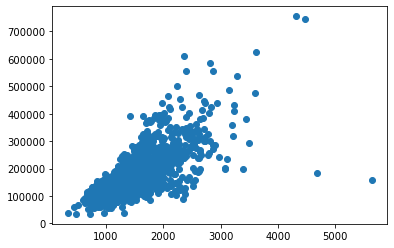

In [94]:
# Assumption #1. Check to see if there is a linear relationship
plt.scatter(X,y)

<AxesSubplot:xlabel='grlivarea', ylabel='saleprice'>

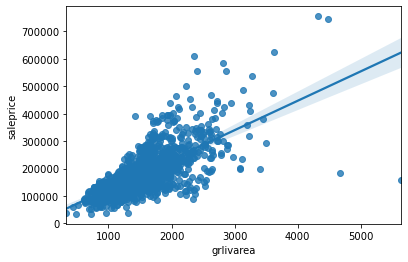

In [95]:
# another method sns.regplot
sns.regplot(x=X,y=y)

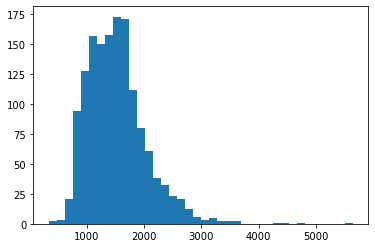

In [101]:
# Create a correct number of bins, and let's look at the distribution
bins = int(len(X['grlivarea']) **0.5)
plt.hist(X['grlivarea'], bins=bins);

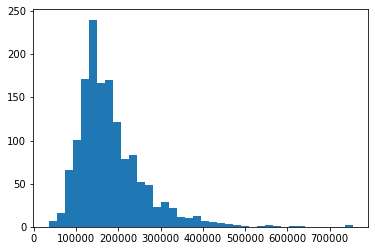

In [102]:
# And for Sale price, as well
plt.hist(y,bins= bins);

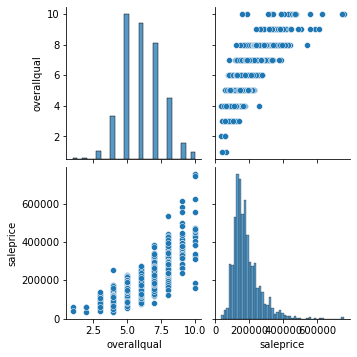

In [103]:
#Alternate way to get all the above info
tot_df = df[['overallqual','saleprice']]
sns.pairplot(tot_df)

What does this tell us?

In [104]:
# statsmodel first
# IMPORTANT: add constant for statsmodels
sm_lr = sm.OLS(y,sm.add_constant(X))

In [105]:
# Summary
sm_lr.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Tue, 22 Mar 2022   Prob (F-statistic):          4.52e-223
Time:                        12:16:43   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.857e+04   4480.755      4.144      0.000    9779.612    2.74e+04
grlivarea    107.1304      2.794     38.348      0.000     101.650     112.610
==============================================================================
Omnibus:                      261.166   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3432.287
Skew:                           0.410   Prob(JB):                         0.00
Kurtosis:                      10.467   Cond. No.                     4.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### How do we compare this?

Baseline!

There's a [class](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html) for it!

In [106]:
# Instantiate
dummy_lr = DummyRegressor()

In [107]:
# fit
dummy_lr.fit(X,y)

DummyRegressor()

In [108]:
# score
dummy_lr.score(X,y)

0.0

Well that's a relief. We're at least better then that.

### Error assumptions

#### Normally Distributed with a mean of 0

In [109]:
# Instantiate
sk_lr = LinearRegression()

In [110]:
# fit
sk_lr.fit(X,y)

LinearRegression()

In [111]:
# score
sk_lr.score(X,y)

0.5021486502718042

In [112]:
# predict
preds = sk_lr.predict(X)
preds

array([201761.93968805, 153767.53887136, 209903.84696945, ...,
       269254.06583652, 134055.55282165, 153124.75671756])

In [113]:
# calculate residuals
resids = y - preds


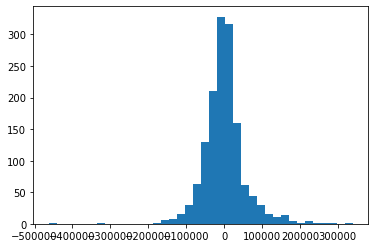

In [114]:
# Histogram of residuals
plt.hist(resids , bins = bins);

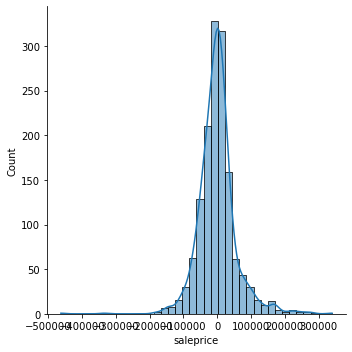

In [115]:
# sns
sns.displot(resids,bins=bins,kde = True)

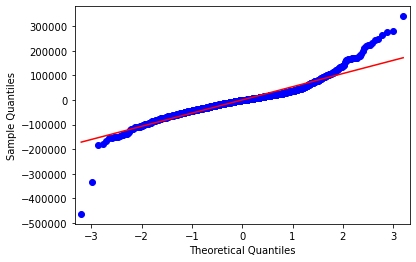

In [116]:
# QQ!
sm.qqplot(resids,line='r');

#### Thoughts?
Overeall residuals has quite a few outliers but otherwise looks normal-ish

#### Heteroskedacity

<AxesSubplot:xlabel='grlivarea', ylabel='saleprice'>

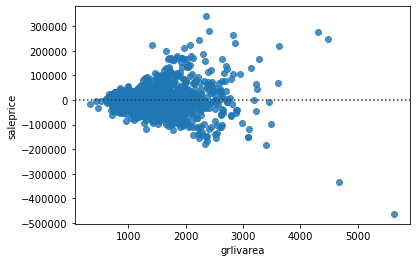

In [117]:
# resid plot sns.residplot
# only 2 variables allowed. prettier in one line tho
sns.residplot(x=X,y=y)

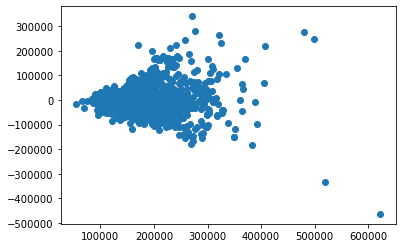

In [118]:
# scatter
# Preferable. Multiple variables
plt.scatter(preds,resids)

#### Thoughts?
Residuals violaes homoskedacity assumption

#### No autocorrelation in residuals

Hello, [Durbin-Watson!](https://en.wikipedia.org/wiki/Durbin%E2%80%93Watson_statistic)

In [80]:
print('\nPerforming Durbin-Watson Test')
print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
print('0 to 2< is positive autocorrelation')
print('>2 to 4 is negative autocorrelation')
print('-------------------------------------')
durbinWatson = durbin_watson(resids)
print('Durbin-Watson:', durbinWatson)
if durbinWatson < 1.5:
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
elif durbinWatson > 2.5:
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')


Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 1.989575701962023
Little to no autocorrelation 

Assumption satisfied


The above code was audaciously stolen from [this](https://jeffmacaluso.github.io/post/LinearRegressionAssumptions/) excellent article.

#### Thoughts?

 The Durbin-Watson test for auto correlation is satisfied. The residuals 

## Your turn!

Your goal is find a feature or an interaction of features that outperforms this model. GO!

In [121]:
X = df.select_dtypes([np.number])
y = df.saleprice

In [122]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1460 non-null   int64  
 1   mssubclass     1460 non-null   int64  
 2   lotfrontage    1201 non-null   float64
 3   lotarea        1460 non-null   int64  
 4   overallqual    1460 non-null   int64  
 5   overallcond    1460 non-null   int64  
 6   yearbuilt      1460 non-null   int64  
 7   yearremodadd   1460 non-null   int64  
 8   masvnrarea     1452 non-null   float64
 9   bsmtfinsf1     1460 non-null   int64  
 10  bsmtfinsf2     1460 non-null   int64  
 11  bsmtunfsf      1460 non-null   int64  
 12  totalbsmtsf    1460 non-null   int64  
 13  1stflrsf       1460 non-null   int64  
 14  2ndflrsf       1460 non-null   int64  
 15  lowqualfinsf   1460 non-null   int64  
 16  grlivarea      1460 non-null   int64  
 17  bsmtfullbath   1460 non-null   int64  
 18  bsmthalf

In [124]:
X.corr()['saleprice'].sort_values(ascending=False)


saleprice        1.000000
overallqual      0.790982
grlivarea        0.708624
garagecars       0.640409
garagearea       0.623431
totalbsmtsf      0.613581
1stflrsf         0.605852
fullbath         0.560664
totrmsabvgrd     0.533723
yearbuilt        0.522897
yearremodadd     0.507101
garageyrblt      0.486362
masvnrarea       0.477493
fireplaces       0.466929
bsmtfinsf1       0.386420
lotfrontage      0.351799
wooddecksf       0.324413
2ndflrsf         0.319334
openporchsf      0.315856
halfbath         0.284108
lotarea          0.263843
bsmtfullbath     0.227122
bsmtunfsf        0.214479
bedroomabvgr     0.168213
screenporch      0.111447
poolarea         0.092404
mosold           0.046432
3ssnporch        0.044584
bsmtfinsf2      -0.011378
bsmthalfbath    -0.016844
miscval         -0.021190
id              -0.021917
lowqualfinsf    -0.025606
yrsold          -0.028923
overallcond     -0.077856
mssubclass      -0.084284
enclosedporch   -0.128578
kitchenabvgr    -0.135907
Name: salepr

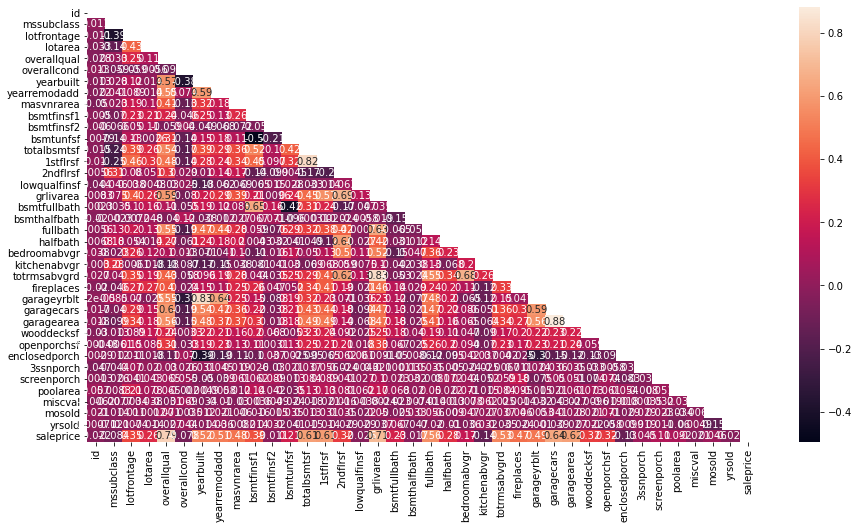

In [84]:
mask = np.triu(np.ones_like(x_corr, dtype=bool))
f,ax = plt.subplots(figsize=(15,8))
ax = sns.heatmap(x_corr, mask=mask, annot=True)
# need to manually set my ylim because of my version of matplotlib
plt.show()

<ipython-input-140-a3e5e5984323>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


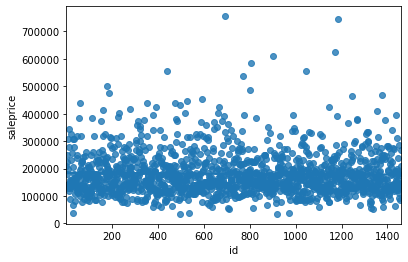

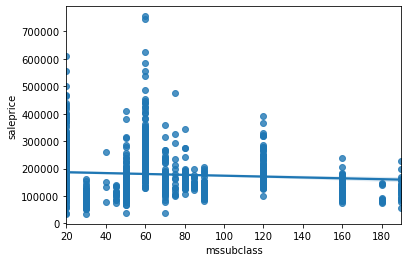

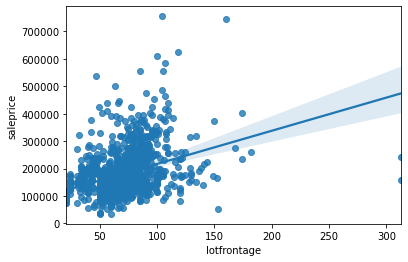

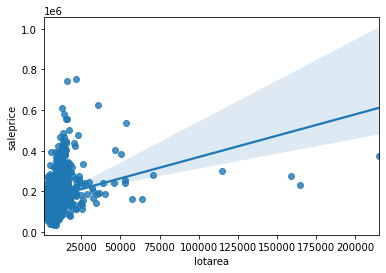

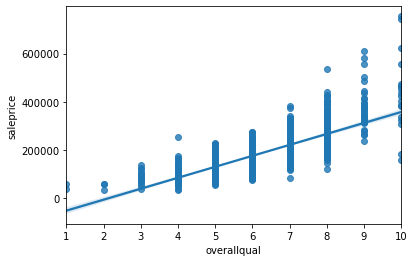

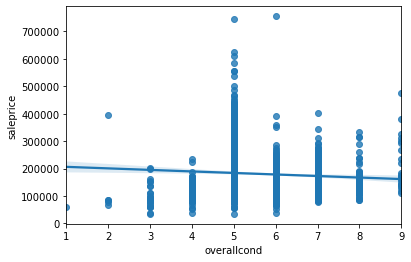

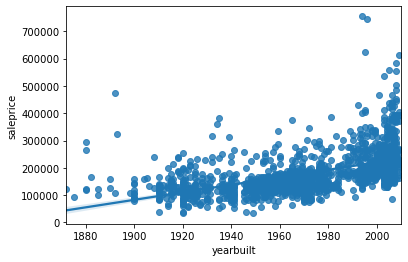

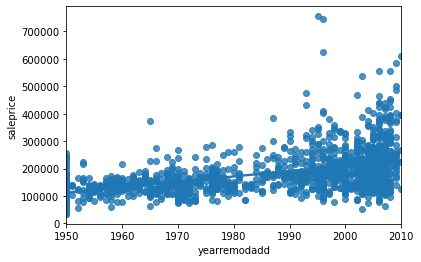

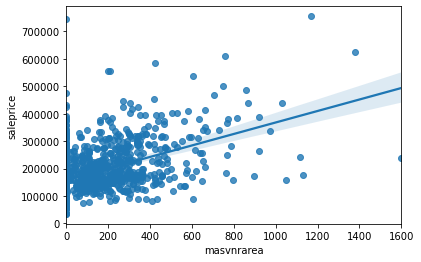

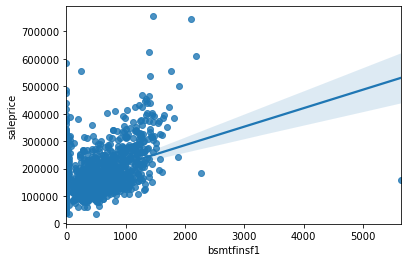

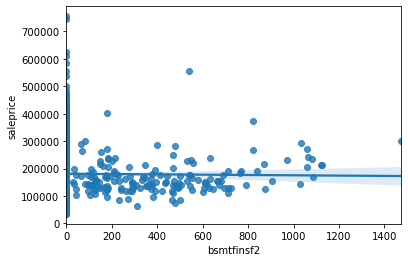

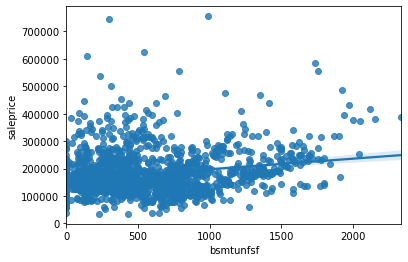

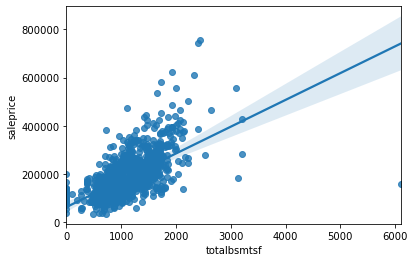

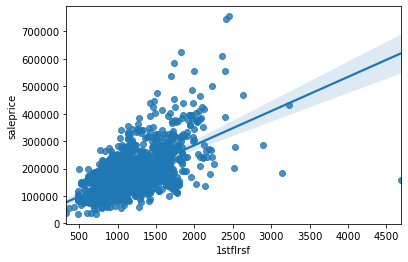

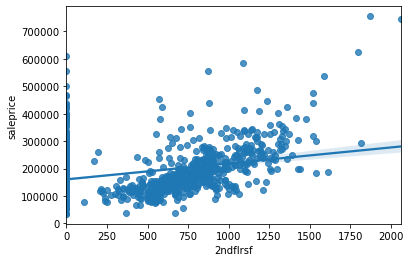

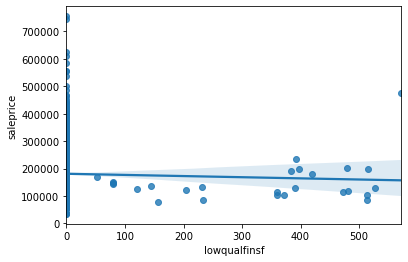

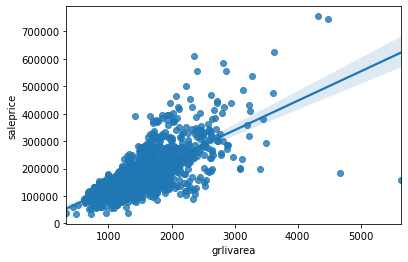

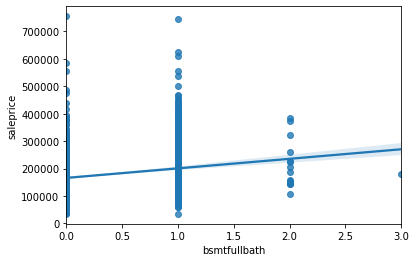

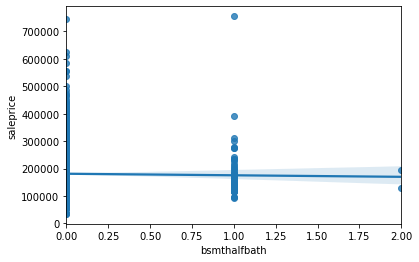

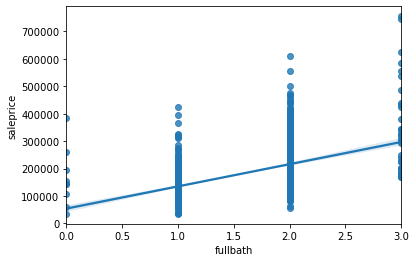

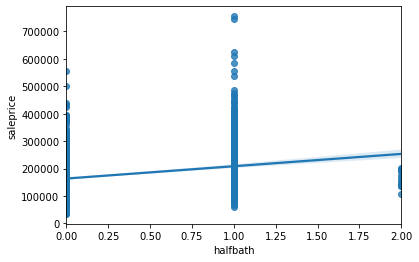

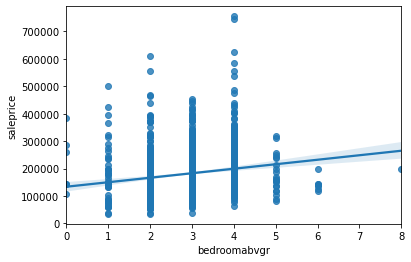

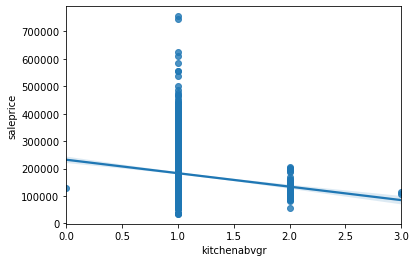

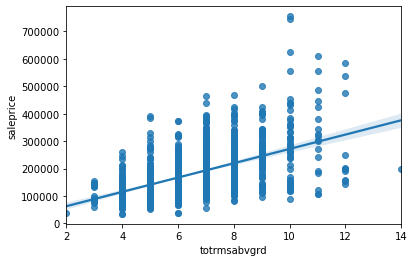

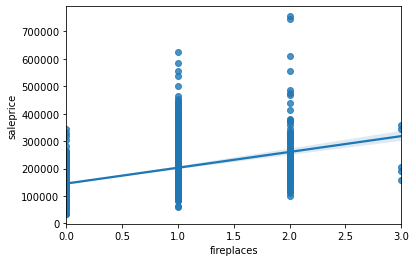

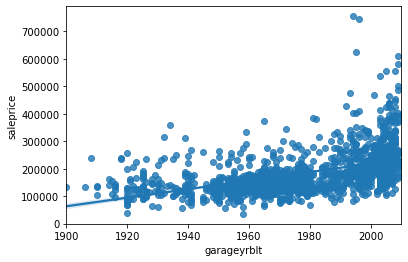

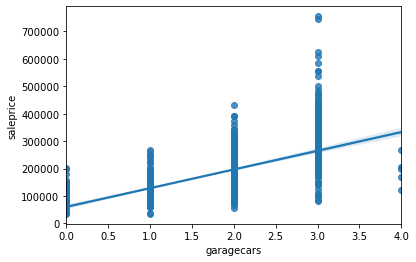

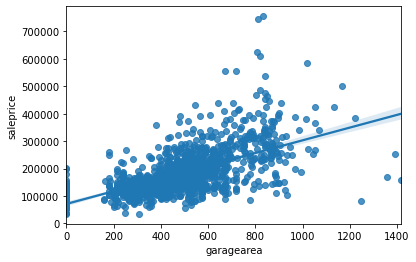

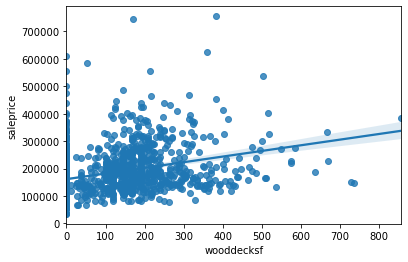

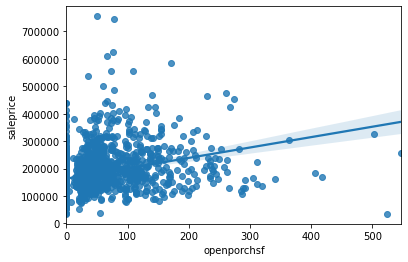

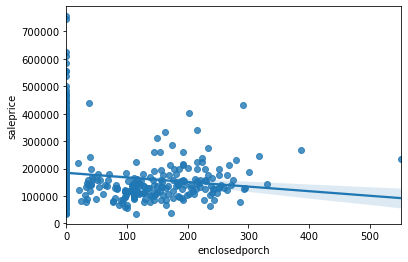

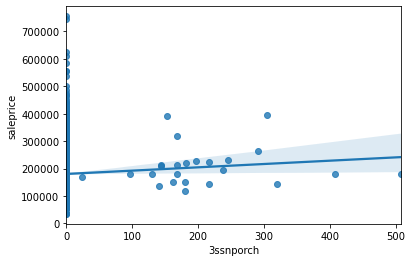

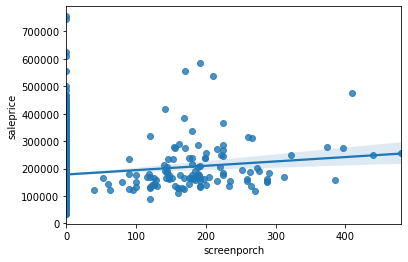

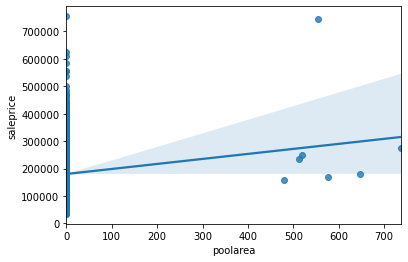

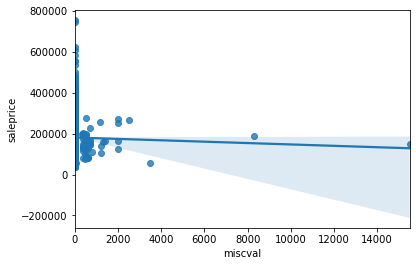

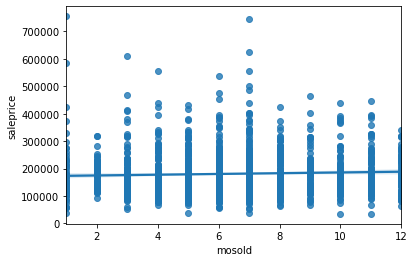

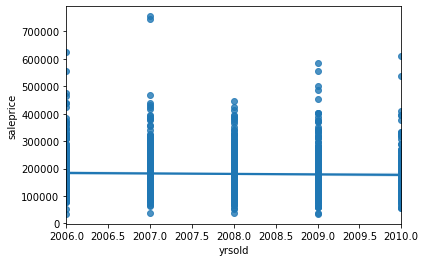

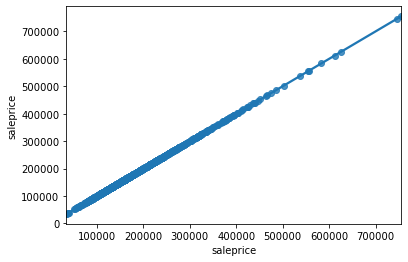

In [140]:
for i, col in enumerate(X.columns):
    plt.figure(i)
    sns.regplot(x=X[col], y=y)

C:\Users\saads\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\saads\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
<ipython-input-144-81acb2dca801>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


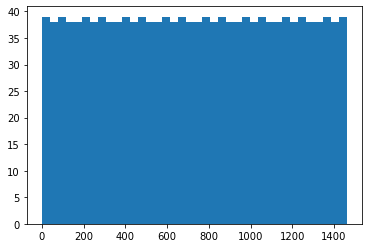

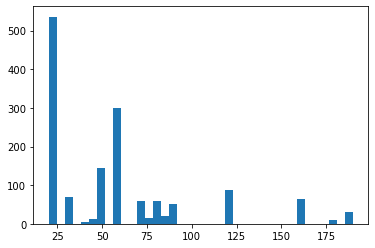

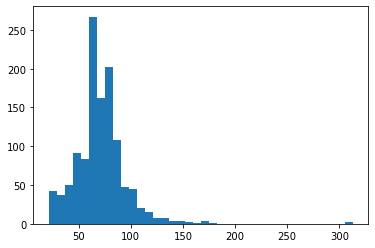

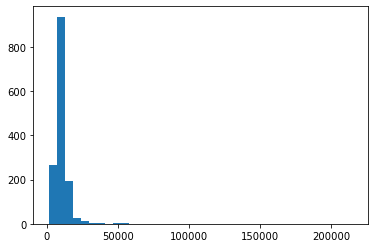

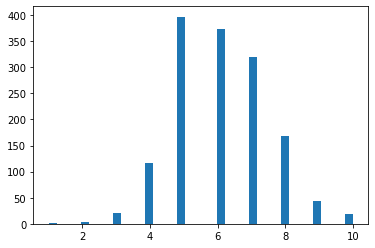

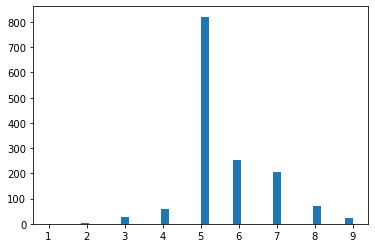

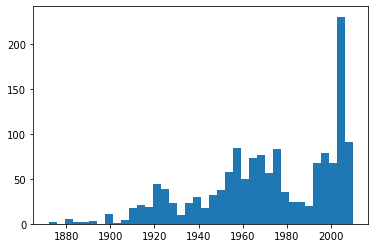

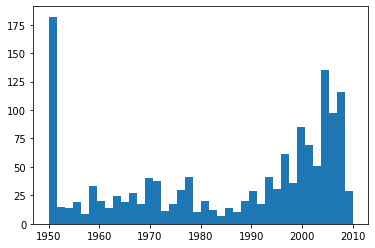

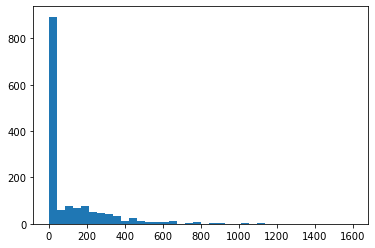

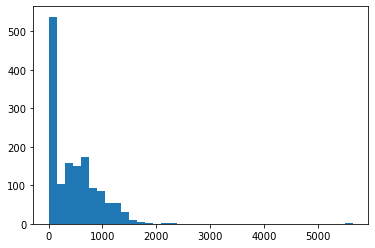

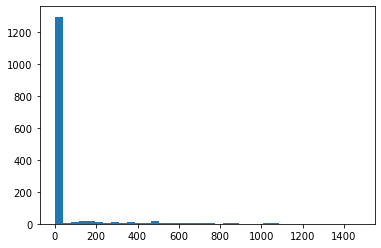

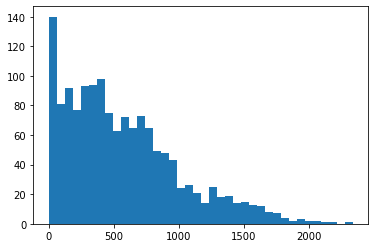

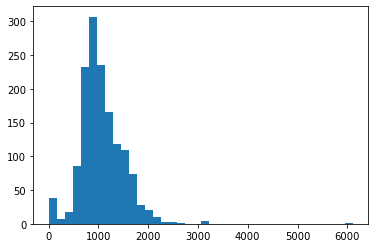

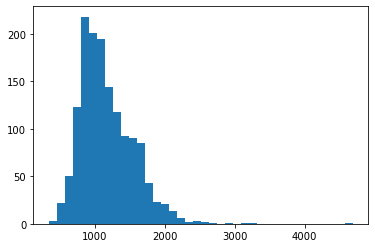

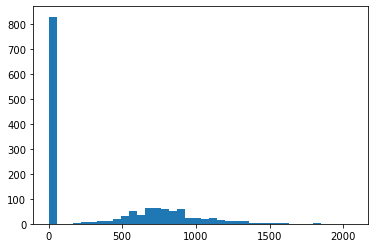

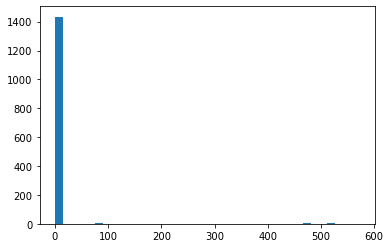

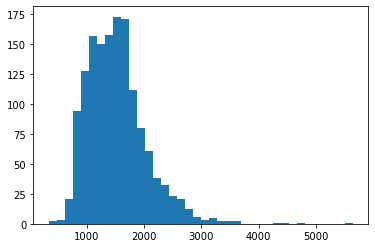

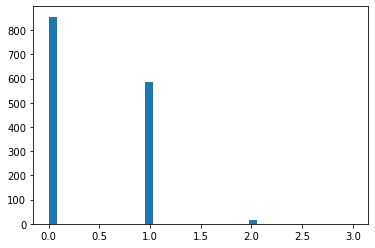

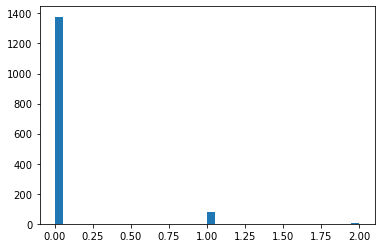

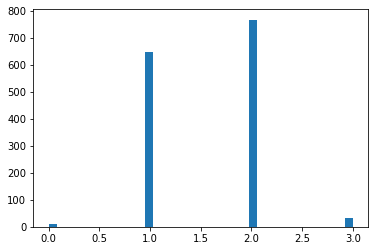

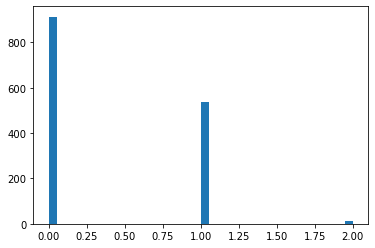

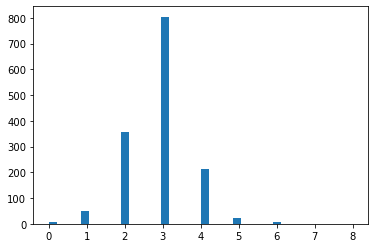

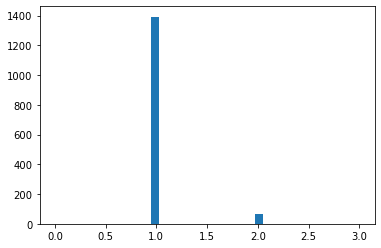

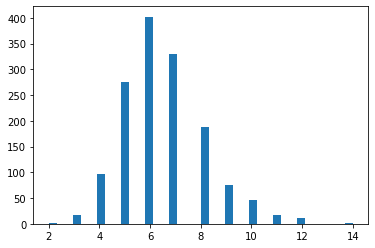

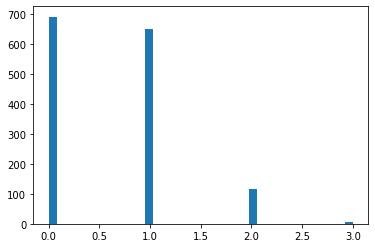

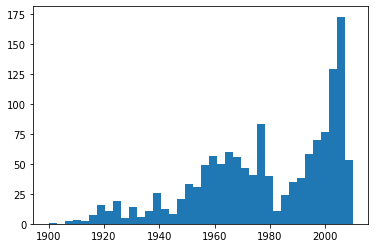

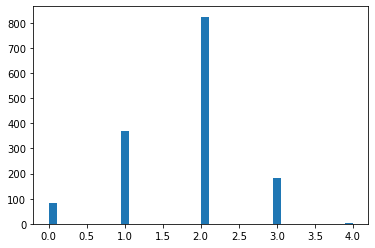

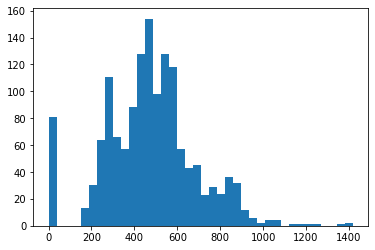

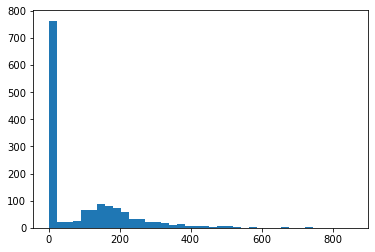

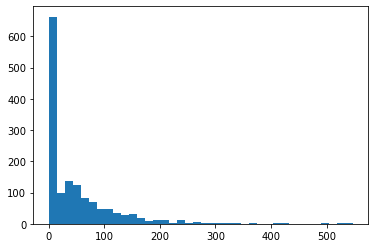

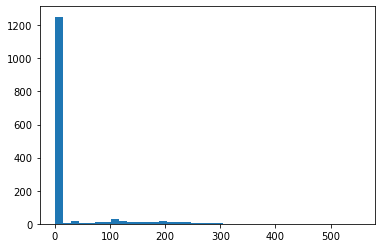

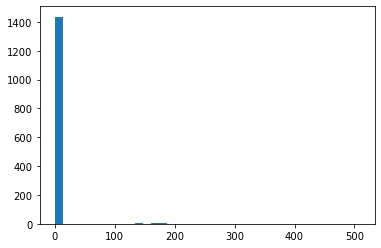

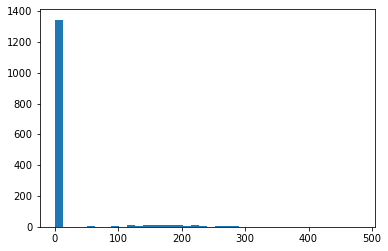

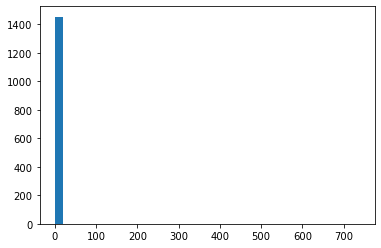

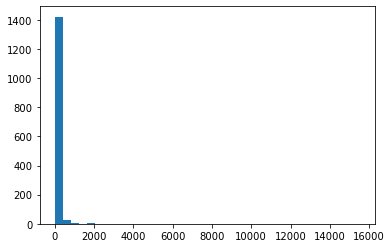

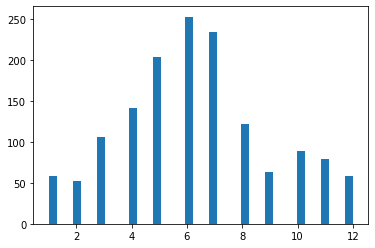

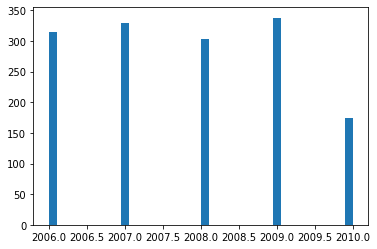

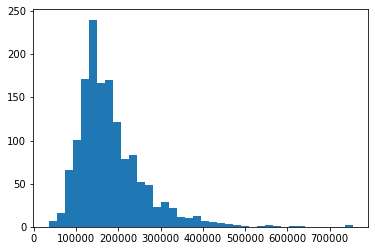

In [144]:
# Create a correct number of bins, and let's look at the distribution
bins = int(X.shape[0] **0.5)

for i, col in enumerate(X.columns):
    plt.figure(i)   
    plt.hist(X[col], bins=bins);